In [14]:
import np
import os
import pandas as pd
import json
import matplotlib.pyplot as plt
from dotenv import main

In [6]:
main.load_dotenv()
json_file_path = os.getenv('DAT_DATA_PATH')
print(json_file_path)
with open(json_file_path, 'r') as file:
    json_data = json.load(file)

data = json_data['intel_final']

df = pd.DataFrame(data)


/Users/pourya/db/intel_final_202407102005.json


In [7]:
df.head(10)

,id,commit,conf,edsize,edsizenonjavadoc,f1,fn_mappings,fn_programelements,fp_mappings,fp_programelements,...,precision,recall,repo,srcpath,tp_mappings,tp_programelements,tp_raw_mappings,tp_raw_programelements,trv_mappings,trv_programelements
0,525979,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=height, st_minprio=3}",154,154,0.904943,16,2,6,1,...,0.944444,0.868613,https://github.com/processing/processing.git,core/src/processing/opengl/PSurfaceJOGL.java,115,4,744,88,629,84
1,525980,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=size, st_minprio=4}",136,136,0.913208,14,2,6,1,...,0.945312,0.883212,https://github.com/processing/processing.git,core/src/processing/opengl/PSurfaceJOGL.java,117,4,746,88,629,84
2,525981,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=size, st_minprio=3}",136,136,0.913208,14,2,6,1,...,0.945312,0.883212,https://github.com/processing/processing.git,core/src/processing/opengl/PSurfaceJOGL.java,117,4,746,88,629,84
3,525982,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=height, st_minprio=1}",182,182,0.946970,11,1,2,0,...,0.984252,0.912409,https://github.com/processing/processing.git,core/src/processing/opengl/PSurfaceJOGL.java,120,5,749,89,629,84
4,523791,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",306,306,0.776596,17,2,21,2,...,0.760417,0.793478,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,67,6,157,28,90,22
5,523792,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",443,443,0.843243,13,1,14,1,...,0.838710,0.847826,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,71,7,161,29,90,22
6,523793,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=size, bu_minsim=0.1, st_minprio=3...",443,443,0.843243,13,1,14,1,...,0.838710,0.847826,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,71,7,161,29,90,22
7,523794,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",569,563,0.784091,15,8,14,1,...,0.821429,0.750000,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,69,0,159,22,90,22
8,523795,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=size, bu_minsim=0.1, st_minprio=4...",449,443,0.843243,13,1,14,1,...,0.838710,0.847826,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,71,7,161,29,90,22
9,523796,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",663,639,0.766667,15,12,14,1,...,0.821429,0.718750,https://github.com/pockethub/PocketHub.git,app/src/main/java/com/github/mobile/accounts/L...,69,0,159,18,90,22


In [8]:
print(list(df.columns))

['id', 'commit', 'conf', 'edsize', 'edsizenonjavadoc', 'f1', 'fn_mappings', 'fn_programelements', 'fp_mappings', 'fp_programelements', 'matcher', 'precision', 'recall', 'repo', 'srcpath', 'tp_mappings', 'tp_programelements', 'tp_raw_mappings', 'tp_raw_programelements', 'trv_mappings', 'trv_programelements']


In [9]:
df_min_max = df.groupby(['repo', 'commit', 'srcpath'])['edsize'].agg(['min', 'max']).reset_index()

In [45]:
df_merged = pd.merge(df, df_min_max, on=['repo', 'commit', 'srcpath'], how='left')

# Step 3: Calculate the scores
df_merged['score'] = (df_merged['max'] - df_merged['edsize']) / (df_merged['max'] - df_merged['min'])

In [46]:
df_merged

,id,commit,conf,edsize,edsizenonjavadoc,f1,fn_mappings,fn_programelements,fp_mappings,fp_programelements,...,srcpath,tp_mappings,tp_programelements,tp_raw_mappings,tp_raw_programelements,trv_mappings,trv_programelements,min,max,score
0,525979,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=height, st_minprio=3}",154,154,0.904943,16,2,6,1,...,core/src/processing/opengl/PSurfaceJOGL.java,115,4,744,88,629,84,103,1182,0.952734
1,525980,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=size, st_minprio=4}",136,136,0.913208,14,2,6,1,...,core/src/processing/opengl/PSurfaceJOGL.java,117,4,746,88,629,84,103,1182,0.969416
2,525981,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=size, st_minprio=3}",136,136,0.913208,14,2,6,1,...,core/src/processing/opengl/PSurfaceJOGL.java,117,4,746,88,629,84,103,1182,0.969416
3,525982,8707194f003444a9fb8e00bffa2893ef0c2492c6,"{st_priocalc=height, st_minprio=1}",182,182,0.946970,11,1,2,0,...,core/src/processing/opengl/PSurfaceJOGL.java,120,5,749,89,629,84,103,1182,0.926784
4,523791,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",306,306,0.776596,17,2,21,2,...,app/src/main/java/com/github/mobile/accounts/L...,67,6,157,28,90,22,271,980,0.950635
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629845,523787,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=size, bu_minsim=0.1, st_minprio=5...",481,475,0.837989,16,1,11,1,...,app/src/main/java/com/github/mobile/accounts/L...,68,7,158,29,90,22,271,980,0.703808
629846,523788,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=height, bu_minsim=0.1, st_minprio...",720,696,0.758621,18,12,11,1,...,app/src/main/java/com/github/mobile/accounts/L...,66,0,156,18,90,22,271,980,0.366714
629847,523789,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=size, bu_minsim=0.1, st_minprio=1...",279,279,0.801980,9,2,27,2,...,app/src/main/java/com/github/mobile/accounts/L...,75,6,165,28,90,22,271,980,0.988717
629848,523790,a7401e5091c06c68fae499ea1972b40143c66fa9,"{st_priocalc=size, bu_minsim=0.1, st_minprio=2...",306,306,0.776596,17,2,21,2,...,app/src/main/java/com/github/mobile/accounts/L...,67,6,157,28,90,22,271,980,0.950635


In [47]:
df_merged[['repo', 'commit', 'srcpath', 'edsize','min','max','score']]

,repo,commit,srcpath,edsize,min,max,score
0,https://github.com/processing/processing.git,8707194f003444a9fb8e00bffa2893ef0c2492c6,core/src/processing/opengl/PSurfaceJOGL.java,154,103,1182,0.952734
1,https://github.com/processing/processing.git,8707194f003444a9fb8e00bffa2893ef0c2492c6,core/src/processing/opengl/PSurfaceJOGL.java,136,103,1182,0.969416
2,https://github.com/processing/processing.git,8707194f003444a9fb8e00bffa2893ef0c2492c6,core/src/processing/opengl/PSurfaceJOGL.java,136,103,1182,0.969416
3,https://github.com/processing/processing.git,8707194f003444a9fb8e00bffa2893ef0c2492c6,core/src/processing/opengl/PSurfaceJOGL.java,182,103,1182,0.926784
4,https://github.com/pockethub/PocketHub.git,a7401e5091c06c68fae499ea1972b40143c66fa9,app/src/main/java/com/github/mobile/accounts/L...,306,271,980,0.950635
...,...,...,...,...,...,...,...
629845,https://github.com/pockethub/PocketHub.git,a7401e5091c06c68fae499ea1972b40143c66fa9,app/src/main/java/com/github/mobile/accounts/L...,481,271,980,0.703808
629846,https://github.com/pockethub/PocketHub.git,a7401e5091c06c68fae499ea1972b40143c66fa9,app/src/main/java/com/github/mobile/accounts/L...,720,271,980,0.366714
629847,https://github.com/pockethub/PocketHub.git,a7401e5091c06c68fae499ea1972b40143c66fa9,app/src/main/java/com/github/mobile/accounts/L...,279,271,980,0.988717
629848,https://github.com/pockethub/PocketHub.git,a7401e5091c06c68fae499ea1972b40143c66fa9,app/src/main/java/com/github/mobile/accounts/L...,306,271,980,0.950635


In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data
# filtered_df = df_merged[(df_merged['score'] != 0) & (df_merged['score'] != 1)]

filtered_df = df_merged[['score', 'precision', 'recall']]

filtered_df

,score,precision,recall
0,0.952734,0.944444,0.868613
1,0.969416,0.945312,0.883212
2,0.969416,0.945312,0.883212
3,0.926784,0.984252,0.912409
4,0.950635,0.760417,0.793478
...,...,...,...
629845,0.703808,0.862069,0.815217
629846,0.366714,0.846154,0.687500
629847,0.988717,0.736364,0.880435
629848,0.950635,0.760417,0.793478


/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_71886/2918479813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_71886/2918479813.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])
/var/folders/2z/bznpfb9n3m7cdpjcld_nwp8r0000gn/T/ipykernel_71886/2918479813.py:10: Fut

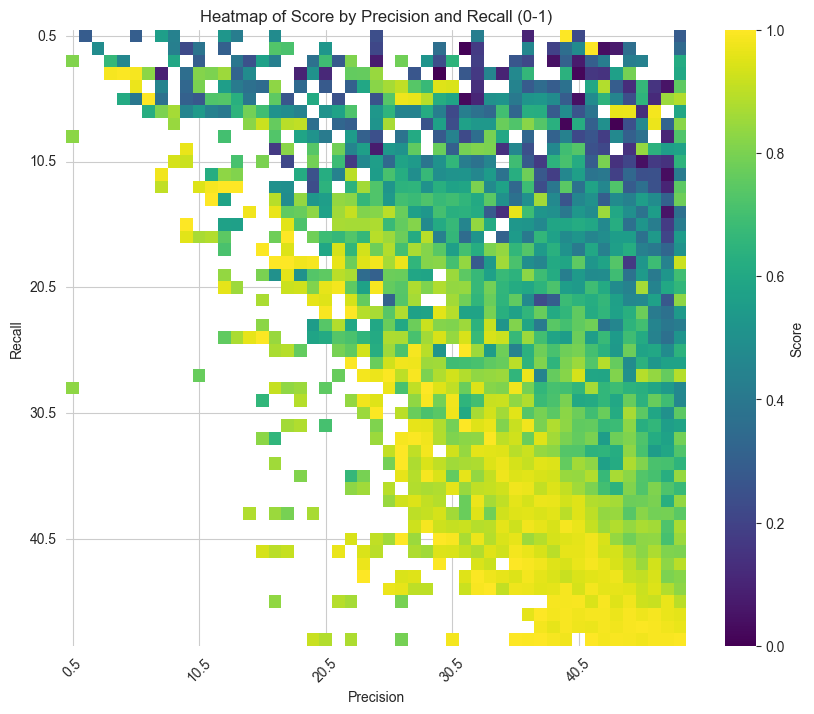

In [58]:
import numpy as np
# Define bins for precision and recall
bins = np.linspace(0, 1, 50)  # 50 evenly spaced bins from 0 to 1

# Bin precision and recall values
filtered_df['precision_bin'] = pd.cut(filtered_df['precision'], bins, labels=bins[:-1])
filtered_df['recall_bin'] = pd.cut(filtered_df['recall'], bins, labels=bins[:-1])

# Create a pivot table for the heatmap
heatmap_data = filtered_df.pivot_table(index='recall_bin', columns='precision_bin', values='score', aggfunc='mean')

# Plot the heatmap
plt.figure(figsize=(10, 8))
ax = sns.heatmap(
    heatmap_data,
    cmap='viridis',
    cbar_kws={'label': 'Score'},
    xticklabels=10,  # Number of ticks along x-axis
    yticklabels=10   # Number of ticks along y-axis
)

# Format tick labels to one decimal place
ax.set_xticklabels([f"{float(label):.1f}" for label in ax.get_xticks()], rotation=45)
ax.set_yticklabels([f"{float(label):.1f}" for label in ax.get_yticks()])

plt.title('Heatmap of Score by Precision and Recall (0-1)')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.savefig('heatmap.png')
# plt.show()

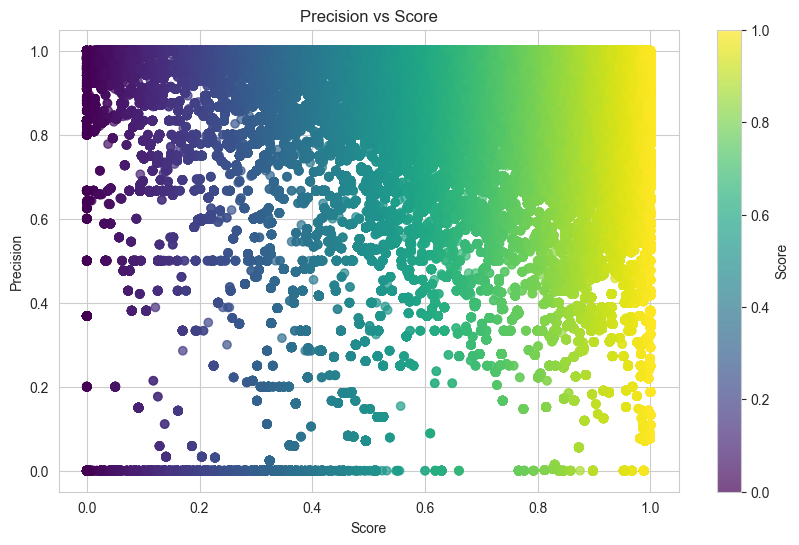

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Filter the data (remove score = 0 or score = 1)
# filtered_df = df[(df['score'] != 0) & (df['score'] != 1)]

# Plot precision vs score
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['score'], filtered_df['precision'], c=filtered_df['score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Score')  # Show color bar for score
plt.title('Precision vs Score')
plt.xlabel('Score')
plt.ylabel('Precision')
plt.show()


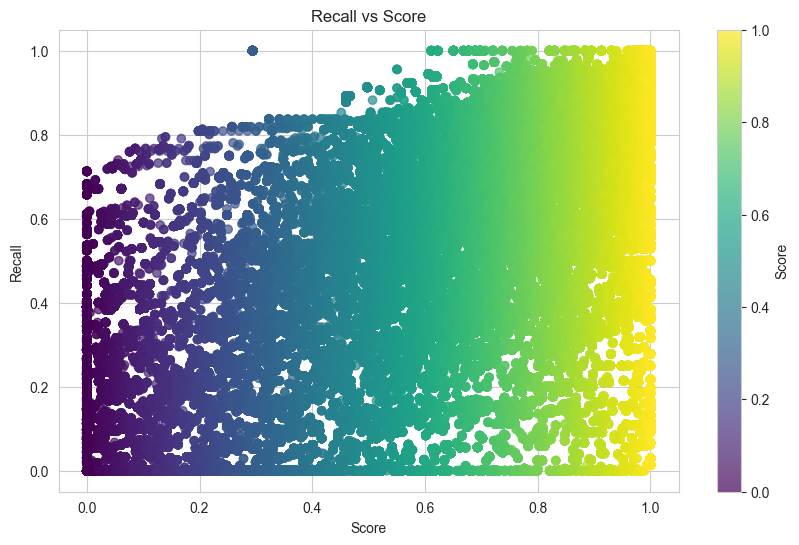

In [63]:


# Filter the data (remove score = 0 or score = 1)
# filtered_df = df[(df['score'] != 0) & (df['score'] != 1)]

# Plot recall vs score
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['score'], filtered_df['recall'], c=filtered_df['score'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Score')  # Show color bar for score
plt.title('Recall vs Score')
plt.xlabel('Score')
plt.ylabel('Recall')
plt.show()


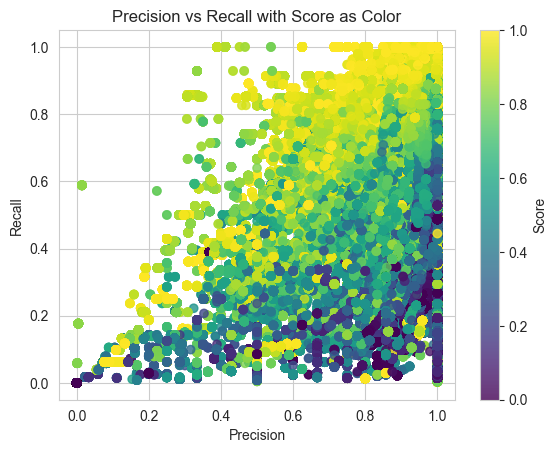

In [69]:
# Create scatter plot with precision on x-axis, recall on y-axis, and score as color
scatter = plt.scatter(filtered_df['precision'], filtered_df['recall'],
                      c=filtered_df['score'], cmap='viridis', alpha=0.8)

# Add color bar to show the mapping of colors to score values
plt.colorbar(scatter, label='Score')

# Labels and title
plt.title('Precision vs Recall with Score as Color')
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.grid(True)

plt.show()